**TITANIC SURVIVAL PREDICTION**

This project is being done by Ankita Ganguli under DATA SCIENCE INTERNSHIP by CODSOFT Batch- JULY2023

After the unfortunate incident happend in the name of adventure, such projects are necessary for the survival of mankind. These kind of projects can be proved as life saving.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('tested[1].csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: ylabel='count'>

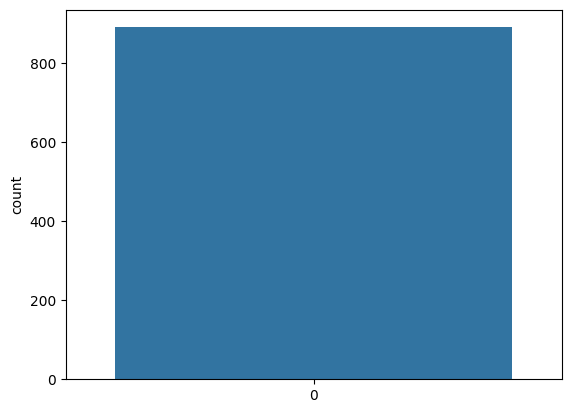

In [17]:
## categorical attributes
sns.countplot(train['Survived'])

<Axes: ylabel='count'>

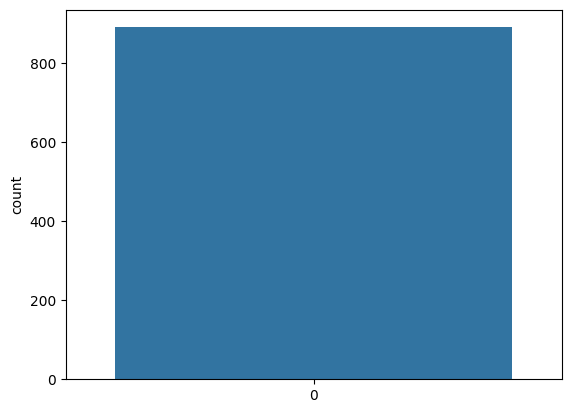

In [18]:
sns.countplot(train['Pclass'])

<Axes: ylabel='count'>

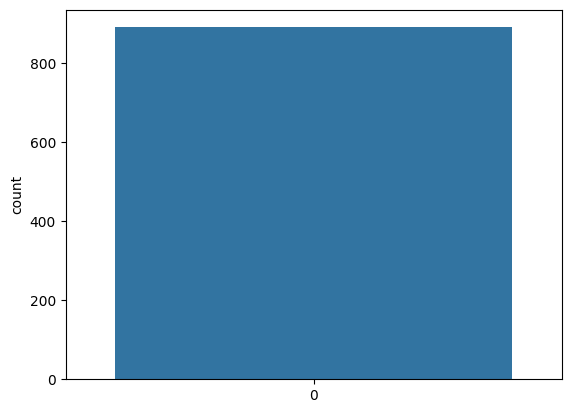

In [19]:
sns.countplot(train['SibSp'])

<Axes: ylabel='count'>

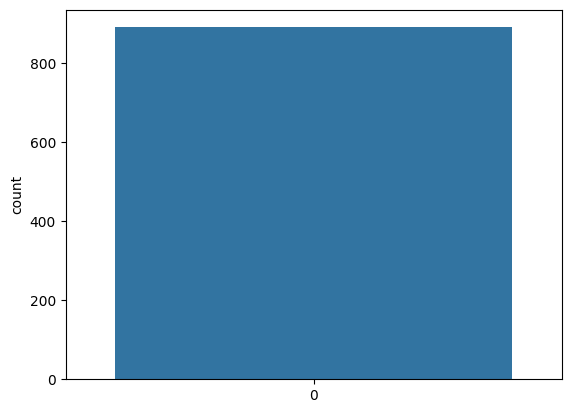

In [20]:
sns.countplot(train['Parch'])

<Axes: xlabel='Age', ylabel='Density'>

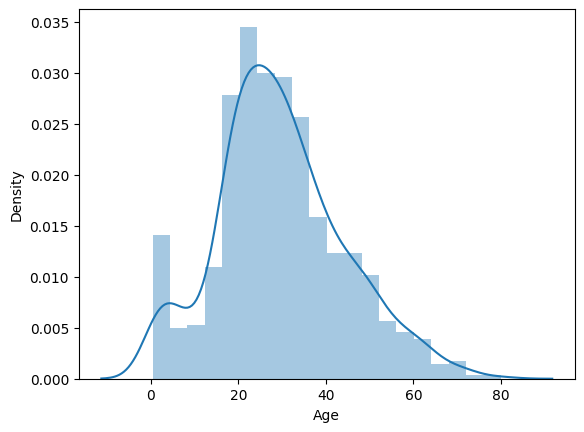

In [22]:
## numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

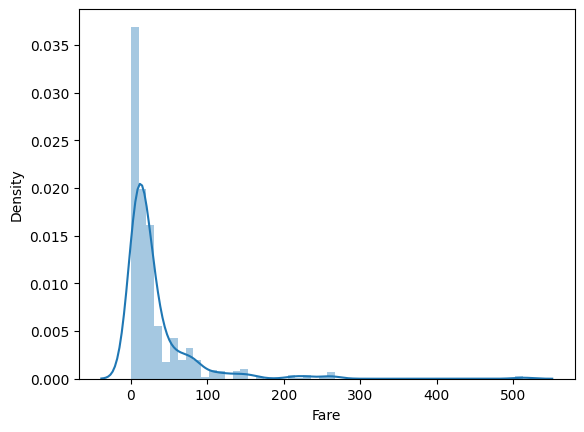

In [23]:
sns.distplot(train['Fare'])

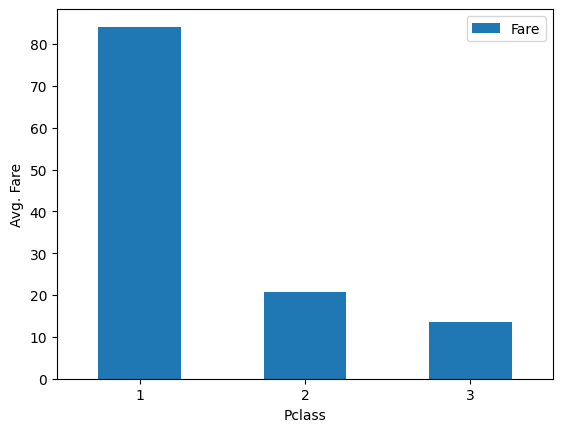

In [24]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

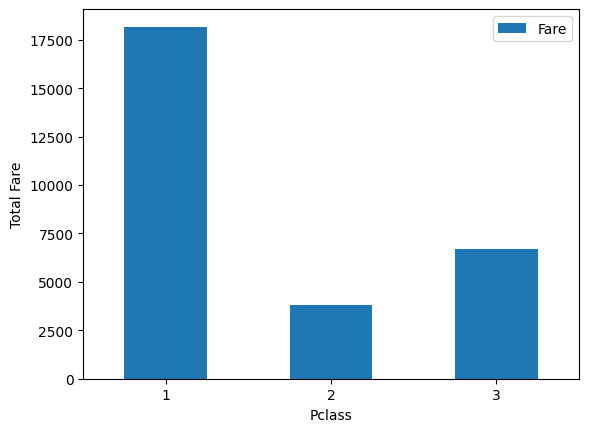

In [25]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

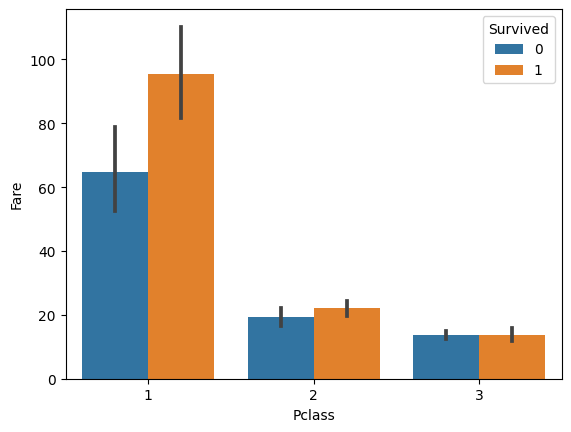

In [26]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

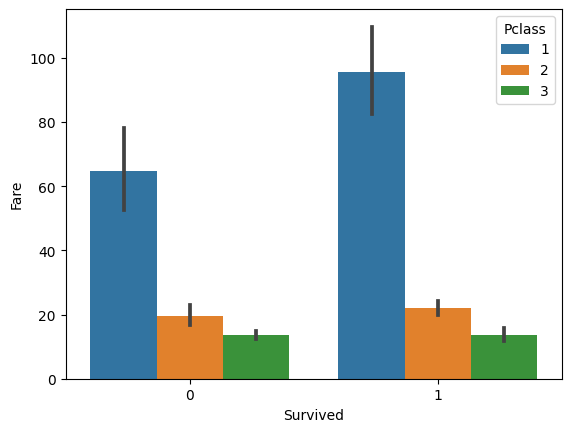

In [27]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

In [28]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


import numpy as np
from google.colab import autoviz
df_7859539581359931849 = autoviz.get_registered_df('df_7859539581359931849')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7859539581359931849, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6975358945803852288 = autoviz.get_registered_df('df_6975358945803852288')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6975358945803852288, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4502618620779063500 = autoviz.get_registered_df('df_4502618620779063500')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4502618620779063500, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8658567231527360272 = autoviz.get_registered_df('df_8658567231527360272')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8658567231527360272, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8502588195805645596 = autoviz.get_registered_df('df_8502588195805645596')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8502588195805645596, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9136710698819881320 = autoviz.get_registered_df('df_9136710698819881320')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9136710698819881320, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_291663155573228883 = autoviz.get_registered_df('df_291663155573228883')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_291663155573228883, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7708939128288487178 = autoviz.get_registered_df('df_7708939128288487178')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7708939128288487178, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4944748898646771098 = autoviz.get_registered_df('df_4944748898646771098')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4944748898646771098, *['Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3805090668396611897 = autoviz.get_registered_df('df_3805090668396611897')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3805090668396611897, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6611033988026318052 = autoviz.get_registered_df('df_6611033988026318052')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6611033988026318052, *['Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2355976373847779403 = autoviz.get_registered_df('df_2355976373847779403')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2355976373847779403, *['Cabin'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3989693142515292414 = autoviz.get_registered_df('df_3989693142515292414')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3989693142515292414, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Age'], ['Age', 'SibSp']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4968385738687747152 = autoviz.get_registered_df('df_4968385738687747152')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4968385738687747152, *['Name', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2017591800156462196 = autoviz.get_registered_df('df_2017591800156462196')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2017591800156462196, *['Sex', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8331838970802663272 = autoviz.get_registered_df('df_8331838970802663272')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8331838970802663272, *['Ticket', 'Cabin'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1141903636512642691 = autoviz.get_registered_df('df_1141903636512642691')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1141903636512642691, *['Cabin', 'Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3383029577656191780 = autoviz.get_registered_df('df_3383029577656191780')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3383029577656191780, *['PassengerId', 'Name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2272492776455851775 = autoviz.get_registered_df('df_2272492776455851775')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2272492776455851775, *['PassengerId', 'Sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7859672132266183975 = autoviz.get_registered_df('df_7859672132266183975')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7859672132266183975, *['PassengerId', 'Ticket'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4833005439515384278 = autoviz.get_registered_df('df_4833005439515384278')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4833005439515384278, *['PassengerId', 'Cabin'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4410585747504234854 = autoviz.get_registered_df('df_4410585747504234854')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4410585747504234854, *['PassengerId', 'Survived', 'Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7505028433017752907 = autoviz.get_registered_df('df_7505028433017752907')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7505028433017752907, *['PassengerId', 'Survived', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6844393297686172616 = autoviz.get_registered_df('df_6844393297686172616')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6844393297686172616, *['PassengerId', 'Survived', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4892344523214173331 = autoviz.get_registered_df('df_4892344523214173331')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4892344523214173331, *['PassengerId', 'Survived', 'Cabin'], **{})
chart

In [29]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


import numpy as np
from google.colab import autoviz
df_6536154265835516515 = autoviz.get_registered_df('df_6536154265835516515')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6536154265835516515, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6717292842027786355 = autoviz.get_registered_df('df_6717292842027786355')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6717292842027786355, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4088874340863255633 = autoviz.get_registered_df('df_4088874340863255633')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4088874340863255633, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8799005806172196757 = autoviz.get_registered_df('df_8799005806172196757')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8799005806172196757, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2794128368234517707 = autoviz.get_registered_df('df_2794128368234517707')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2794128368234517707, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1911315306973002962 = autoviz.get_registered_df('df_1911315306973002962')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1911315306973002962, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_502180075848462469 = autoviz.get_registered_df('df_502180075848462469')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_502180075848462469, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2551048640582986488 = autoviz.get_registered_df('df_2551048640582986488')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2551048640582986488, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6514558578641662620 = autoviz.get_registered_df('df_6514558578641662620')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6514558578641662620, *['Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1248219365689176 = autoviz.get_registered_df('df_1248219365689176')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1248219365689176, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9104244907381519210 = autoviz.get_registered_df('df_9104244907381519210')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_9104244907381519210, *['Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8062939674208884714 = autoviz.get_registered_df('df_8062939674208884714')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8062939674208884714, *['Cabin'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6823638805575391400 = autoviz.get_registered_df('df_6823638805575391400')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6823638805575391400, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Age'], ['Age', 'SibSp']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5971228287473903719 = autoviz.get_registered_df('df_5971228287473903719')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5971228287473903719, *['Name', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5807966986487249148 = autoviz.get_registered_df('df_5807966986487249148')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5807966986487249148, *['Sex', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_642739274688613427 = autoviz.get_registered_df('df_642739274688613427')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_642739274688613427, *['Ticket', 'Cabin'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5183486800041849595 = autoviz.get_registered_df('df_5183486800041849595')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5183486800041849595, *['Cabin', 'Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7209927973497769952 = autoviz.get_registered_df('df_7209927973497769952')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7209927973497769952, *['PassengerId', 'Name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6889355733573671280 = autoviz.get_registered_df('df_6889355733573671280')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6889355733573671280, *['PassengerId', 'Sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_4822554669253040529 = autoviz.get_registered_df('df_4822554669253040529')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4822554669253040529, *['PassengerId', 'Ticket'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3400892289866478168 = autoviz.get_registered_df('df_3400892289866478168')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3400892289866478168, *['PassengerId', 'Cabin'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8092047200852307004 = autoviz.get_registered_df('df_8092047200852307004')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8092047200852307004, *['PassengerId', 'Survived', 'Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4820387270775310484 = autoviz.get_registered_df('df_4820387270775310484')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4820387270775310484, *['PassengerId', 'Survived', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9140866958445922414 = autoviz.get_registered_df('df_9140866958445922414')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_9140866958445922414, *['PassengerId', 'Survived', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1488370396739412641 = autoviz.get_registered_df('df_1488370396739412641')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1488370396739412641, *['PassengerId', 'Survived', 'Cabin'], **{})
chart

In [30]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [31]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [32]:
df['Age'].mean()

29.881137667304014

In [33]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [34]:
df['Embarked'].mode()[0]

'S'

In [35]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

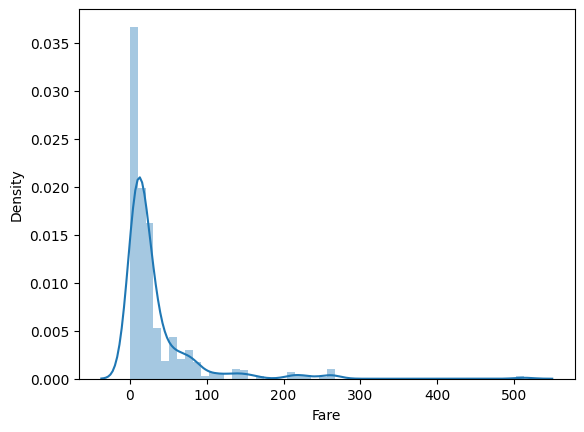

In [36]:
sns.distplot(df['Fare'])

In [37]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

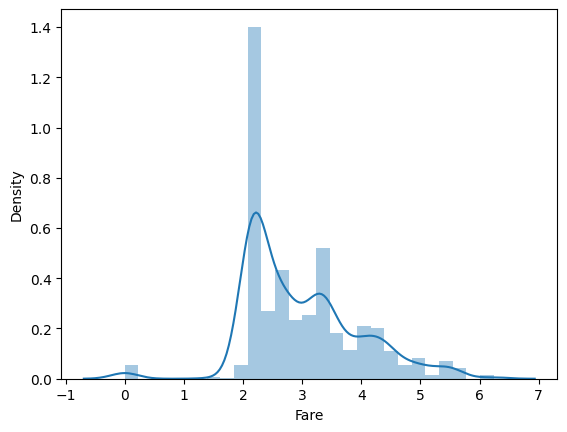

In [38]:
sns.distplot(df['Fare'])

<Axes: >

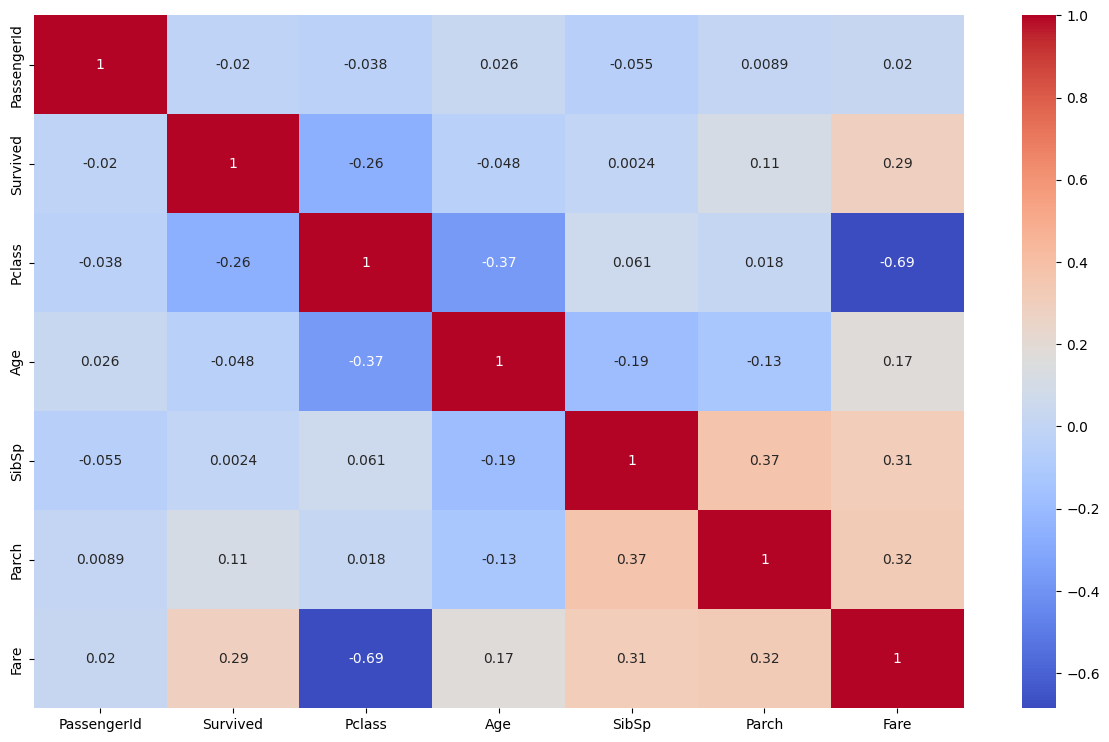

In [39]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


import numpy as np
from google.colab import autoviz
df_6962812674841500372 = autoviz.get_registered_df('df_6962812674841500372')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6962812674841500372, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6168251967679234232 = autoviz.get_registered_df('df_6168251967679234232')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6168251967679234232, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4610791164684505368 = autoviz.get_registered_df('df_4610791164684505368')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4610791164684505368, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7841317389015204577 = autoviz.get_registered_df('df_7841317389015204577')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7841317389015204577, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1153339415582761354 = autoviz.get_registered_df('df_1153339415582761354')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1153339415582761354, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3977132176869956346 = autoviz.get_registered_df('df_3977132176869956346')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3977132176869956346, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5910166945466439391 = autoviz.get_registered_df('df_5910166945466439391')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5910166945466439391, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6730457979524237905 = autoviz.get_registered_df('df_6730457979524237905')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6730457979524237905, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1791615996250171777 = autoviz.get_registered_df('df_1791615996250171777')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1791615996250171777, *['Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_674347572333647047 = autoviz.get_registered_df('df_674347572333647047')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_674347572333647047, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7472224507108598995 = autoviz.get_registered_df('df_7472224507108598995')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7472224507108598995, *['Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6594090887735585030 = autoviz.get_registered_df('df_6594090887735585030')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6594090887735585030, *['Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1188774723910427803 = autoviz.get_registered_df('df_1188774723910427803')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1188774723910427803, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Age'], ['Age', 'SibSp']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6172575499379376947 = autoviz.get_registered_df('df_6172575499379376947')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6172575499379376947, *['Name', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2421457346415227027 = autoviz.get_registered_df('df_2421457346415227027')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2421457346415227027, *['Sex', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2377725215360827092 = autoviz.get_registered_df('df_2377725215360827092')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2377725215360827092, *['Ticket', 'Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3821321146490021268 = autoviz.get_registered_df('df_3821321146490021268')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3821321146490021268, *['PassengerId', 'Name'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3546959436306745497 = autoviz.get_registered_df('df_3546959436306745497')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3546959436306745497, *['PassengerId', 'Sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6952406305287205133 = autoviz.get_registered_df('df_6952406305287205133')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6952406305287205133, *['PassengerId', 'Ticket'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2129282221499735215 = autoviz.get_registered_df('df_2129282221499735215')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2129282221499735215, *['PassengerId', 'Embarked'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_517510404936469479 = autoviz.get_registered_df('df_517510404936469479')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_517510404936469479, *['PassengerId', 'Survived', 'Name'], **{})
chart

import numpy as np
from google.colab import autoviz
df_450347522528977625 = autoviz.get_registered_df('df_450347522528977625')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_450347522528977625, *['PassengerId', 'Survived', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8360920280927808758 = autoviz.get_registered_df('df_8360920280927808758')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8360920280927808758, *['PassengerId', 'Survived', 'Ticket'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1928969964239165678 = autoviz.get_registered_df('df_1928969964239165678')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1928969964239165678, *['PassengerId', 'Survived', 'Embarked'], **{})
chart

In [41]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,2.110213,S
1,2,1,1,female,38.0,1,0,4.280593,C
2,3,1,3,female,26.0,0,0,2.188856,S
3,4,1,1,female,35.0,1,0,3.990834,S
4,5,0,3,male,35.0,0,0,2.202765,S


import numpy as np
from google.colab import autoviz
df_6094538155304495540 = autoviz.get_registered_df('df_6094538155304495540')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6094538155304495540, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4564573972035257397 = autoviz.get_registered_df('df_4564573972035257397')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4564573972035257397, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3369802614979215385 = autoviz.get_registered_df('df_3369802614979215385')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3369802614979215385, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3941062848375477859 = autoviz.get_registered_df('df_3941062848375477859')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3941062848375477859, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1851234080885293998 = autoviz.get_registered_df('df_1851234080885293998')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1851234080885293998, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5382118226079538196 = autoviz.get_registered_df('df_5382118226079538196')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5382118226079538196, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2901760967310478297 = autoviz.get_registered_df('df_2901760967310478297')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2901760967310478297, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8546489195765489463 = autoviz.get_registered_df('df_8546489195765489463')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8546489195765489463, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6417347586639213554 = autoviz.get_registered_df('df_6417347586639213554')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6417347586639213554, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8207599915197314298 = autoviz.get_registered_df('df_8207599915197314298')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8207599915197314298, *['Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6908200720049196478 = autoviz.get_registered_df('df_6908200720049196478')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6908200720049196478, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Age'], ['Age', 'SibSp']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5132410417363165979 = autoviz.get_registered_df('df_5132410417363165979')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5132410417363165979, *['Sex', 'Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5047127113652040195 = autoviz.get_registered_df('df_5047127113652040195')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5047127113652040195, *['PassengerId', 'Sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5907959362586323420 = autoviz.get_registered_df('df_5907959362586323420')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5907959362586323420, *['PassengerId', 'Embarked'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7712655201729509385 = autoviz.get_registered_df('df_7712655201729509385')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7712655201729509385, *['Survived', 'Sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8998263480364820194 = autoviz.get_registered_df('df_8998263480364820194')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8998263480364820194, *['Survived', 'Embarked'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2253106126685357916 = autoviz.get_registered_df('df_2253106126685357916')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2253106126685357916, *['PassengerId', 'Survived', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_711621131789150975 = autoviz.get_registered_df('df_711621131789150975')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_711621131789150975, *['PassengerId', 'Survived', 'Embarked'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1234869247303445973 = autoviz.get_registered_df('df_1234869247303445973')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1234869247303445973, *['PassengerId', 'Pclass', 'Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_447794774440344593 = autoviz.get_registered_df('df_447794774440344593')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_447794774440344593, *['PassengerId', 'Pclass', 'Embarked'], **{})
chart

In [42]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4604617618923615672, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Sex'], ['Sex', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Survived', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Pclass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Age', None], **{})
chart

In [43]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4604617618923615672, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4604617618923615672, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4604617618923615672, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Sex'], ['Sex', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Survived', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Pclass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4604617618923615672 = autoviz.get_registered_df('df_4604617618923615672')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4604617618923615672, *['PassengerId', 'Age', None], **{})
chart

In [45]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.5,0,0,2.178064,1
892,893,1,3,0,47.0,1,0,2.079442,2
893,894,0,2,1,62.0,0,0,2.369075,1
894,895,0,3,1,27.0,0,0,2.268252,2
895,896,1,3,0,22.0,1,1,2.586824,2


import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7485965471843432336, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Sex'], ['Sex', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Survived', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Pclass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Age', None], **{})
chart

In [46]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [47]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5712298191626834726, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5712298191626834726, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5712298191626834726, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5712298191626834726, *['SibSp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5712298191626834726, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5712298191626834726, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5712298191626834726, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5712298191626834726, *['SibSp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5712298191626834726 = autoviz.get_registered_df('df_5712298191626834726')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_5712298191626834726, *[[['Pclass', 'Sex'], ['Sex', 'Age'], ['Age', 'SibSp'], ['SibSp', 'Fare']]], **{})
chart

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7309417040358744
CV Score: 0.7733224530789028


In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8137216747222397


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.7912874270290627


In [53]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8125980792166217


In [54]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV Score: 0.8238277572029377


In [56]:
model = LGBMClassifier()
model.fit(X, y)

LGBMClassifier()

In [57]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0,3,1,34.5,0,0,2.178064,1
892,893,1,3,0,47.0,1,0,2.079442,2
893,894,0,2,1,62.0,0,0,2.369075,1
894,895,0,3,1,27.0,0,0,2.268252,2
895,896,1,3,0,22.0,1,1,2.586824,2


import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485965471843432336, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['PassengerId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7485965471843432336, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7485965471843432336, *[[['PassengerId', 'Survived'], ['Survived', 'Pclass'], ['Pclass', 'Sex'], ['Sex', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Survived', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Pclass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485965471843432336 = autoviz.get_registered_df('df_7485965471843432336')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7485965471843432336, *['PassengerId', 'Age', None], **{})
chart

In [58]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [59]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6006600389102745273, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6006600389102745273, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6006600389102745273, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6006600389102745273, *['SibSp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6006600389102745273, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6006600389102745273, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6006600389102745273, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6006600389102745273, *['SibSp'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6006600389102745273, *[[['Pclass', 'Sex'], ['Sex', 'Age'], ['Age', 'SibSp'], ['SibSp', 'Parch']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6006600389102745273, *['Parch', 'Pclass', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6006600389102745273, *['Parch', 'Sex', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6006600389102745273, *['Parch', 'Age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6006600389102745273 = autoviz.get_registered_df('df_6006600389102745273')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6006600389102745273, *['Parch', 'SibSp', None], **{})
chart

In [60]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,